In [1]:
from __future__ import print_function
import os
import sys
sys.path.append('../')
%matplotlib inline

In [2]:
import local_env
import utils.service as us
import utils.viewer as uv
import utils.multiprocess as um
reload(um)
reload(us)
reload(uv)
from utils.service import ClusterService
from utils.viewer import ClusterViewer
from utils.multiprocess import map_with_threadpool

---
#### ENV VARS

In [3]:
None==os.environ.get('csv_bucket')

True

In [4]:
local_env.export()


EXPORTING dev ENV:
	width: 5
	iterations: 25
	csv_bucket: gfw-clusters-test
	url: http://wri-tiles.s3.amazonaws.com/glad_prod/tiles
	min_count: 25
	bucket: wri-tiles
	zoom: 12




In [5]:
os.environ.get('csv_bucket')

'gfw-clusters-test'

---
### ClusterService

In [6]:
WIDTHS=[5,8,10,12,15]
X,Y=1396,2090

In [7]:
def service_and_view_for_width(w):
    service=ClusterService(x=X,y=Y,width=w)
    service.run()
    view=ClusterViewer(service)
    return w, service, view


def get_sv_dict(wsv_list):
    sv_dict={}
    for w,s,v in wsv_list:
        sv_dict[w]={ 'service': s, 'view': v }
    return sv_dict

In [8]:
%time wsv_list=map_with_threadpool(service_and_view_for_width,WIDTHS)

CPU times: user 453 ms, sys: 166 ms, total: 619 ms
Wall time: 1min 20s


In [9]:
SV_DICT=get_sv_dict(wsv_list)

In [13]:
def view_data(width):
    service=SV_DICT[width]['service']
    view=SV_DICT[width]['view']
    df=service.dataframe().head()
    print("----------------------------------")
    print("WIDTH:",width)
    print("----------------------------------")
    if df.shape[0]:
        print(df[df.columns[:-1]])
        print("----------------------------------")
        print("INPUT DATA")
        print("----------------------------------")
        view.input(0)
        print("----------------------------------")
        print("CLUSTERS")
        print("----------------------------------")
        view.clusters(start=0,end=4,convex_hull=True)
    else:
        print("NO CLUSTERS FOUND")

In [14]:
print('WIDTHS:',SV_DICT.keys())

WIDTHS: [8, 10, 12, 5, 15]


----------------------------------
WIDTH: 5
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0     81   179  20150821  20171223  -3.710524 -57.282973  1396  2090
1    102   765  20150626  20171028  -3.724282 -57.249196  1396  2090
2     83   295  20151016  20171223  -3.770025 -57.219554  1396  2090
3     28    69  20150509  20171028  -3.738383 -57.219554  1396  2090
4     56   191  20150509  20171028  -3.714995 -57.222656  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 31
TOTAL COUNT: 3435
TOTAL AREA: 13036
DATES: 2015-05-09 to 2017-12-23


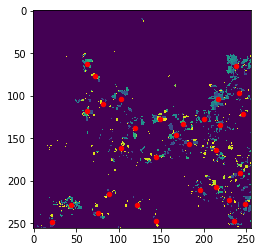

----------------------------------
CLUSTERS
----------------------------------


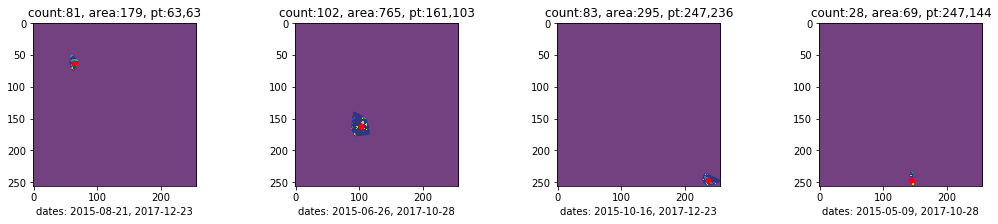

In [15]:
view_data(5)

----------------------------------
WIDTH: 8
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0    352   864  20150602  20171028  -3.770713 -57.281939  1396  2090
1    123  1028  20150821  20171223  -3.711556 -57.281250  1396  2090
2    159   987  20150728  20171028  -3.723594 -57.267808  1396  2090
3    575  2911  20150525  20171105  -3.764178 -57.266429  1396  2090
4    169   932  20150821  20171105  -3.711556 -57.264017  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 16
TOTAL COUNT: 3502
TOTAL AREA: 20332
DATES: 2015-05-09 to 2017-12-23


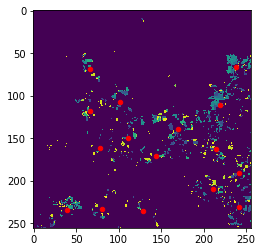

----------------------------------
CLUSTERS
----------------------------------


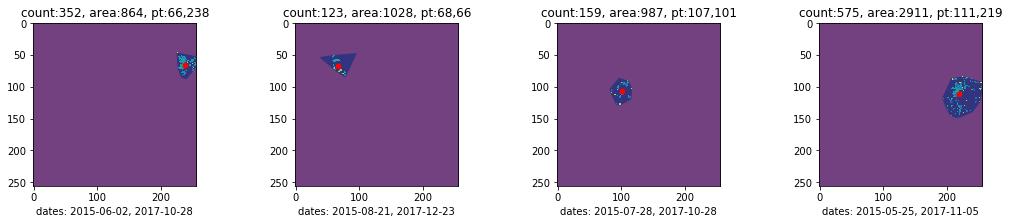

In [16]:
view_data(8)

----------------------------------
WIDTH: 10
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0    357   891  20150602  20171028  -3.770369 -57.281250  1396  2090
1    123  1028  20150821  20171223  -3.711556 -57.280905  1396  2090
2    573  2999  20150525  20171105  -3.763834 -57.266085  1396  2090
3    331  2598  20150728  20171105  -3.717403 -57.265395  1396  2090
4    653  3867  20150602  20171105  -3.745950 -57.255400  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 12
TOTAL COUNT: 3505
TOTAL AREA: 23476
DATES: 2015-05-09 to 2017-12-23


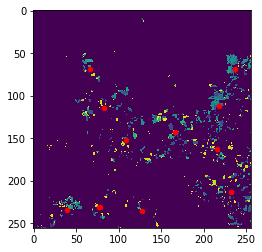

----------------------------------
CLUSTERS
----------------------------------


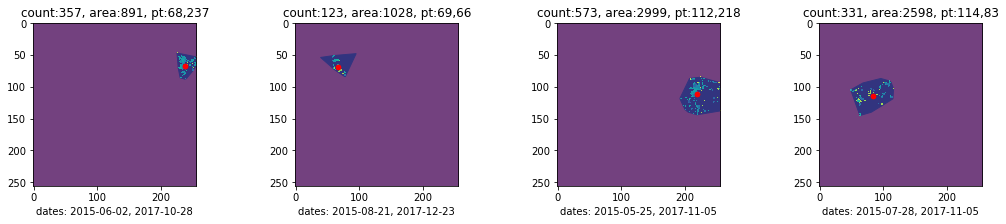

In [17]:
view_data(10)

----------------------------------
WIDTH: 12
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0    123  1028  20150821  20171223  -3.712244 -57.279182  1396  2090
1    201   408  20150805  20171028  -3.769337 -57.278148  1396  2090
2    188   754  20150602  20171105  -3.769337 -57.277803  1396  2090
3    565  2933  20150525  20171105  -3.763834 -57.266085  1396  2090
4    331  2598  20150728  20171105  -3.717747 -57.265051  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 11
TOTAL COUNT: 3512
TOTAL AREA: 27758
DATES: 2015-05-09 to 2017-12-23


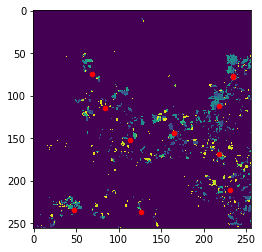

----------------------------------
CLUSTERS
----------------------------------


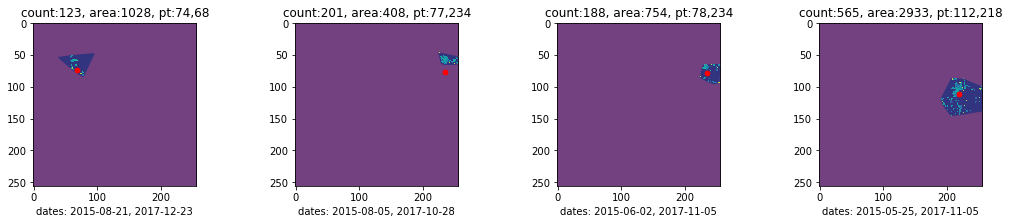

In [18]:
view_data(12)

----------------------------------
WIDTH: 15
----------------------------------
   count   area  min_date  max_date  longitude   latitude     x     y
0    923   4495  20150525  20171105  -3.765898 -57.270910  1396  2090
1    463   5530  20150728  20171223  -3.717403 -57.267119  1396  2090
2    981  10164  20150602  20171105  -3.743886 -57.255055  1396  2090
3    728   5754  20150509  20171223  -3.767961 -57.233341  1396  2090
4    340   3976  20150509  20171105  -3.705021 -57.223690  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 6
TOTAL COUNT: 3512
TOTAL AREA: 32074
DATES: 2015-05-09 to 2017-12-23


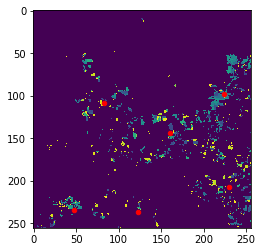

----------------------------------
CLUSTERS
----------------------------------


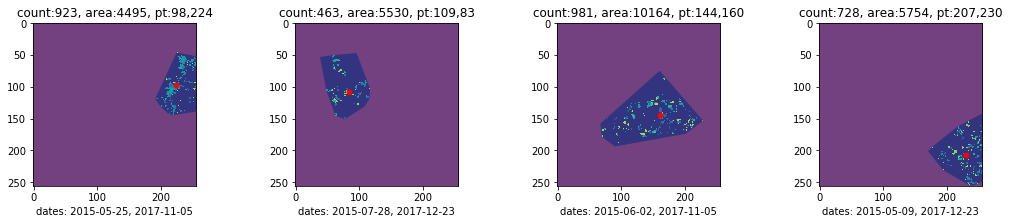

In [19]:
view_data(15)